# 🧠**MLP** **- Multi Layer Percepton**



## *INTRODUÇÃO*


---






## O QUE É MLP?
As redes neurais são um dos pilares do aprendizado de máquina, inspiradas no funcionamento do cérebro humano. Elas são compostas por unidades de processamento chamadas neurônios artificiais, que são organizados em camadas e interconectados entre si. O perceptron é o bloco básico dessas redes: um modelo simples de neurônio artificial que realiza uma tarefa fundamental de classificação, calculando uma combinação ponderada das entradas e decidindo uma saída binária. Redes neurais modernas são formadas por múltiplos perceptrons organizados em camadas, permitindo que aprendam padrões complexos a partir dos dados. O principal objetivo dessas redes é aprender a partir de dados e, com isso, realizar tarefas como reconhecimento de padrões, previsão de valores ou tomada de decisões.



### Estrutura do MLP
A sua estrutura se baseia em camadas, com os neurônios anteriores sintetizando informações de camadas mais internas, e gerando redes neurais artificiais, as **feed-forward**.

**▶ Camada de entrada:**
Aqui recebemos os dados, onde cada neurônio desta camada representa uma característica dos dados, se formos criar uma rede neural de classificação de imagens, cada neurônio representaria um pixel da imagem. Aqui, não temos processamentos, o sinal só é propagado a frente.

**▶ Camadas ocultas:**
As camadas ocultas são as intermediárias, que processam as informações e extraem padrões dos dados, elas não tem contato algum com o os dados de entrado e saída. Cada camada dessa terá um número de definido de neurônios.

**▶ Camadas de saída:**
As camadas de saída fornece o resultado final da rede, podendo ser uma clissificação, ou seja, categoria, ou uma regressão, com um conjunto númerico.

As camadas estão completamente conectadas entre elas, ou seja, cada neurônio de uma camada está ligado a todos os neurônios da próxima camada. As primeiras camadas recebem dados e fazem seus cálculos, produzndo uma versão transformada das informações originais, assim, passando para as próximas camada, temos aqui uma teia de conexões, as **feed-forward**.

Exemplo: Camada de entrada: pixels de uma imagem -> 1° camada oculta: detecta os contornos da imagem -> 2° camada oculta: detecta as formas -> Camada de saída: Identifica o objeto como um gato.

O objetivo do trabalho é aplicar junto a uma rede neural MLP a técnica de classificação KNN na base de dados de escolha da equipe, que foi "Renda do Censo", para prever se a renda anual de um indivíduo excede US$ 50 mil/ano.




## MLP

**Importações essenciais:**

Começamos com a importaçõa de bibliotecas em Pyhton para análise de dados, visualização, pré-processamento, redução de dimensionalidade, modelagem e avaliação de desempenho. Juntamente do carregamento da nossa base de dados, definição dos nomes das colunas e convertendo valores ausentes e espaços em branco.

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Caminho para o arquivo local
caminho_arquivo = 'data/adult/adult.data'

# Nomes das colunas conforme documentação da UCI
colunas = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

# Leitura do arquivo
df = pd.read_csv(caminho_arquivo, names=colunas, na_values=" ?", skipinitialspace=True)

# Visualizar primeiras linhas
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             



---



**Pré-processamento dos Dados:**

Verificamos a quantidade de valores nulos, nas colunas do dataframe, assim podemos considerar a remoção desses espaços para garantir a qualidade no processamento dos dados. Calculamos a porcentagem de linhas com dados faltantes, indicando o impacto de dados incompeltos no nosso conjunto. Assim, é removido todas as linhas com valores nulos.

Realizamos a identificação de colunas catégoricas e converte o valor de string, em um númerico, usando o ``` LabelEncoder```.

Separamos as variáveis entre independentes e alvo, "X" representa os atributos de entrada, ou seja, as informações que serão usadas para prever um resultado e "Y" a variável alvo, o valor que queremos prever. E realizamos a normalização, para torna-los dados mesma escala.



In [16]:
# Verificar valores nulos
print(df.isnull().sum())

# Número total de linhas
total_linhas = len(df)

# Número de linhas com ao menos um valor nulo
linhas_com_nulos = df.isnull().any(axis=1).sum()

# Porcentagem
porcentagem_nulos = (linhas_com_nulos / total_linhas) * 100

print(f"{porcentagem_nulos:.2f}% das linhas possuem ao menos um valor nulo.")

# Remover linhas com valores faltantes
df.dropna(inplace=True)

# Remover colunas pouco informativas
df.drop(['fnlwgt'], axis=1, inplace=True)

# Transformar variáveis categóricas
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Normalizar os dados
scaler = StandardScaler()
X = df.drop('income', axis=1)
y = df['income']

X_scaled = scaler.fit_transform(X)


age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
0.00% das linhas possuem ao menos um valor nulo.




---



**Gráfico de combinações possíveis entre variáveis:**

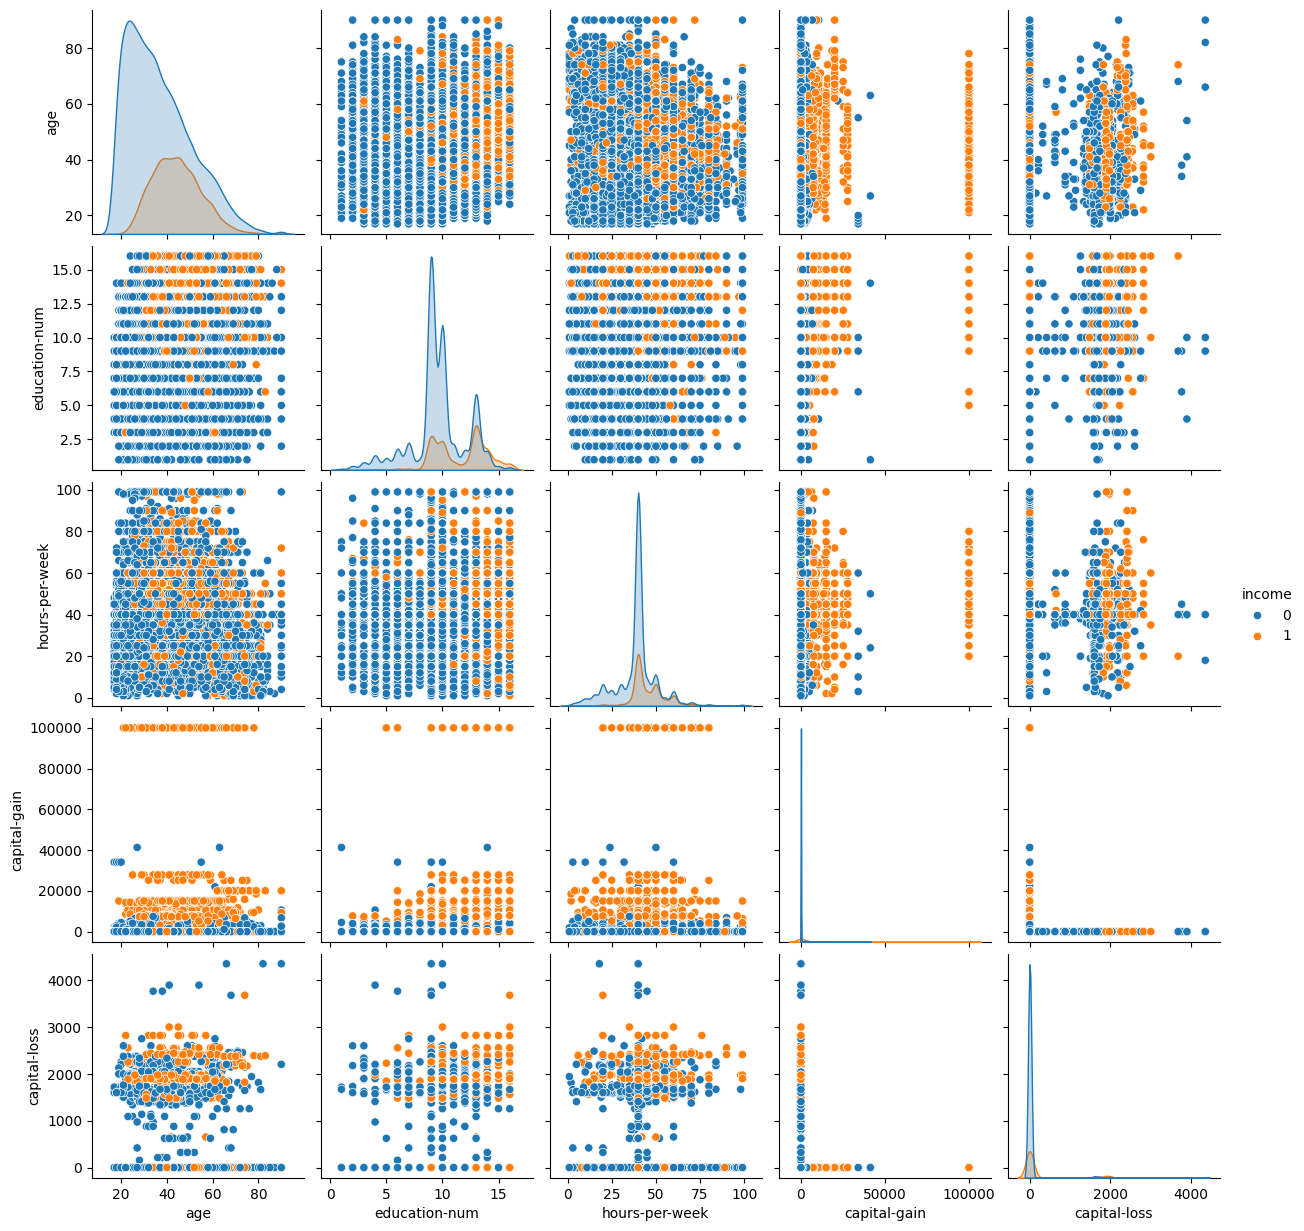

In [17]:
# Selecionar apenas algumas colunas para visualização
subset = df[['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss', 'income']]
sns.pairplot(subset, hue='income', diag_kind='kde')
plt.show()

O gráfico gerado é um pairplot do seaborn, ele mostra a relação entre as várias variáveis do nosso dataset, com a variável-alvo (income), que leva em conta a renda de 0 = renda <=50K e 1 = renda >50K.

As análises que podemos fazer é: pessoas de mais idade tendem a estar no grupo que possuem renda maior, já os jovens estão no grupo de rendas menores. E níveis de educação mais elevados estão associados  uma renda maior, também.

Outras considerações que podemos realizar é que a distribuição do income = 1 aparece em menor quantidade e temos sobreposição entre classes, em algumas das nossas variáveis, como as horas por semana, onde indicam que quem trabalha mais horas por semana pode ter maior renda, mas não é um fato contestado, pois mostra que muitos trabalham mais horas por semana, mas estão no income = 0.



---



**Redução de dimensionalidade - PCA**

Para otmização dos dados, redução da complexidade computacional do nosso modelo, facilitar a visualização bidimensional e evitar problemas de dimensionalidade, aplicamos a técnica de Ánalise de Componentes Principais (PCA), sua função é esboçar o novo espaço com menos dimensões dos dados, preservando a grande parte da variância do nosso conjunto antes do PCA.

O PCA é inicializado com uma preservação de 95% de variância total dos dados, os dados são transformados em um novo conjunto de variáveis, com menos dimensionalidade e mantendo sua variância.

Um gráfico de variância é gerado, scatterplot, dos primeiros componentes após a aplicação do PCA. Os pontos e a cor variada representam a nossa variável-alvo, "income".

Apesar da nossa redução de dimensionalidade, temos uma sobreposição entre as classes, indicando que os dados não seriam separáveis com só esses dois componentes, mas podemos ver uma separação entre os dados.

Uma variância explicada acumulada é plotada, assim, verificamos a quantidade de componentes necessários para manter a maior parte dados originais. Ou seja, é mostrado a variância dos dados originais, a medida que mais componentes principais são adicionados. 

A nossa cruva cresce rápidamente nos primeiros componentes, e obtemos 12 componentes principais com uma variância acumulada a quase 100%, mesmo reduzindo a dimensionalidade, a maior parte das informações necessárias estão nos primeiros componentes.

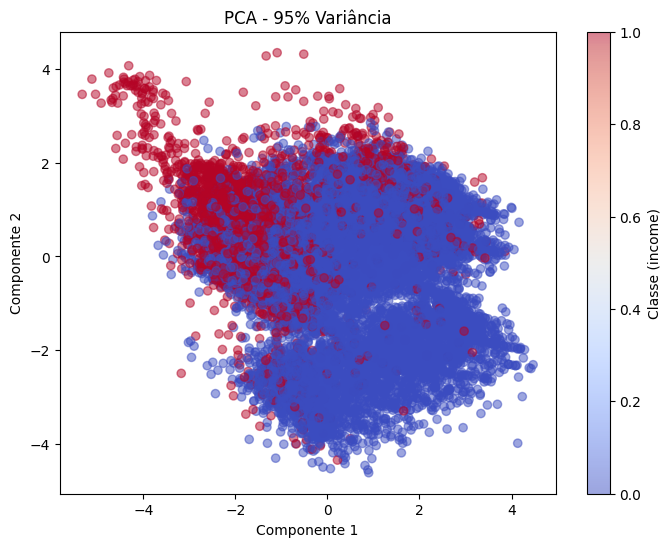

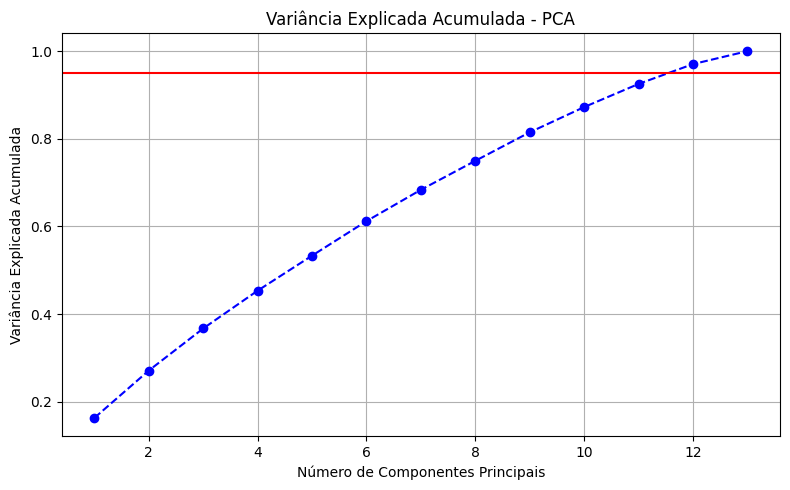

In [18]:
# Inicializar o PCA para manter 95% da variância
pca = PCA(n_components=0.95)

# Ajustar e transformar os dados
X_pca = pca.fit_transform(X_scaled)

# Visualização com PCA
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.5)
plt.title("PCA - 95% Variância")
plt.xlabel("Componente 1")
plt.ylabel("Componente 2")
plt.colorbar(label="Classe (income)")
plt.show()

# Ajustar a PCA novamente apenas para visualizar a variância de cada componente
pca_full = PCA()
pca_full.fit(X_scaled)

# Variância explicada acumulada
cum_var = np.cumsum(pca_full.explained_variance_ratio_)

# Plotar
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cum_var) + 1), cum_var, marker='o', linestyle='--', color='b')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.title("Variância Explicada Acumulada - PCA")
plt.xlabel("Número de Componentes Principais")
plt.ylabel("Variância Explicada Acumulada")
plt.grid(True)
plt.tight_layout()
plt.show()



---



**Treinamento, ajustes e avaliação do MLP:**

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Melhores parâmetros encontrados: {'activation': 'tanh', 'hidden_layer_sizes': (30,), 'learning_rate_init': 0.001, 'max_iter': 500, 'solver': 'adam'}
Acurácia média (cross-validação): 0.8505
Acurácia no teste (20%): 0.8521

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91      4942
           1       0.74      0.60      0.66      1571

    accuracy                           0.85      6513
   macro avg       0.81      0.77      0.78      6513
weighted avg       0.85      0.85      0.85      6513



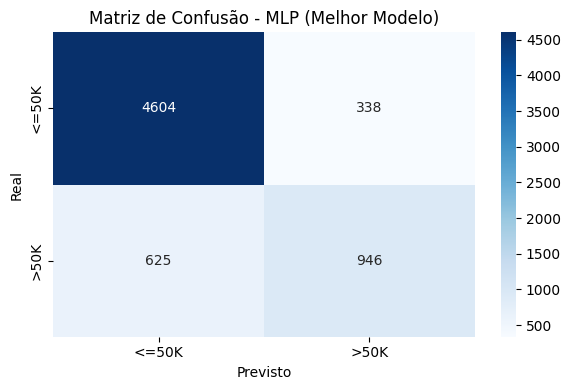

In [ ]:
# Dividir dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Definir o classificador base
mlp = MLPClassifier(random_state=42)

# Grid de parâmetros: tamanhos e número de camadas ocultas
param_grid = {
    'max_iter': [500, 750, 1000],
    'hidden_layer_sizes': [
        (30,), (60,), (100,),              # 1 camada
        (30, 30), (60, 60), (100, 100),     # 2 camadas
    ],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam'],
    'learning_rate_init': [0.001, 0.01, 0.1]
}

# GridSearchCV com validação cruzada
grid_search = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Melhor modelo
best_model = grid_search.best_estimator_
print("Melhores parâmetros encontrados:", grid_search.best_params_)
print(f"Acurácia média (cross-validação): {grid_search.best_score_:.4f}")

# Avaliação no conjunto de teste
y_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred)

print(f"Acurácia no teste (20%): {test_accuracy:.4f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred))

# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['income'].classes_,
            yticklabels=label_encoders['income'].classes_)
plt.title("Matriz de Confusão - MLP (Melhor Modelo)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

Neste trecho começamos a treinar, fazer ajustes e avaliar nosso algoritmo, MLP, usando a validação cruzada assim encontrando os melhores parâmetros. Começamos com a divisão dos dados de treino e teste, e definjimos um conjunto de parâmetros para testar diferentes configurações do MLP:

*  **max_iter:** Número máximo de interações que o algoritmo de treinamento pode passar pelos dados para realizar o ajuste de pesos da nossa rede neural.
*   **hidden_layer_sizes:** Quantidade e tamanho das camadas ocultas e quantos neurônios cada camada possui.
*  **activation:** Função de ativação, assim, permite que a rede aprenda relações não lineares complexas, as escolhidas foram: Relu, que ativa um neurônio apenas se o valor da entrada for positivo; Tanh, saída vária entre 1 e -1, com média zero; e a sigmoid, variando entre 0 e 1, tornando útil para modelar probabilidades.
*   **solver:** Ajusta os pesos durante o treinamento.
*   **learning_rate_init:** Define o tamanhos dos passos que o algoritmo dará para ajustar os pesos a cada iteração.

Segundo nossos parâmetros o modelo de 1 camada oculta, com 30 neurônios, de função de ativação tanh (tangente hiperbólica), taxa de aprendizado 0.001, valor padrão e otimizador Adam, foi o que obteve o melhor desempenho. 

Após isso, começamos a nossa busca de combinaçõe de hiperparâmetros do nosso modelo, usando a validação cruzada, técnica usad apara medir o desempenho de um modelo de algoritmo, onde ela realiza várias divisões nos dados. Ocorre com uma divisão dos dados em 5 partes, onde 1 é para teste e as restantes para treino, e a cada rodada a acurácia é calculada e o resultado da média dessas acurácias é usada como o resultado final, assim, selecionando a combinação de parâmetros e pesos que resultou o melhor desempenho na tarefa de classificação, durante a nossa validação cruzada.

**Nossa acurácia obteve:**

Acurácia média (cross-validação): 0.8505

Acurácia no teste (20%): 0.8521


Podemos avaliar então o conjunto de testes, que foi testado com 20% dos dados, usamos a acurácia, que nos mostra a proporção total das predições corretas sobre a amostra que usamos. Obtivemos uma boa acurácia, de 85%, indicando baixo overfitting.

Usamos a métrica de "precisão", onde, de todas as previsões do modelo como sendo uma classe, quantos estavam devidamente corretos? A "recall" , de sensibilidade, de todos os modelos que realmente pertencem à classe, quantos o modelo conseguiu identificar corretamente? Usamos a "F1-Score", uma média entre a precisão e a recall, penalizando os modelos de valor alto de recall e baixo de precisão, ou ao contrário. E por fim, o "suporte", que identifica a quantidade real de classes no conjunto de dados.

Classe 0, <=50K teve um bom desempenho, (precision 88%, recall 93%, f1-score 91%), indicando assim, poucos falsos negativos. Classe 1, o rrecision de 74%, recall de 60%, F1-score de 66%. Nas médias simples entre as classes, o macro, mostra que a classe de minória (1) puxa o desempenho para baixo; e a weighted, média ponderada pelo número de exemplos, indica desempenho alto, pois a classe 0 é dominante, já que sua média está próxima da acurácia.

A matriz de confusão nós mostra o número de acertos e erros, por classe. A diagonal principal indica as predições corretas e as fora da diagonal, indicam o erros, comparando os rótulos reais e os previstos. 

Podemos concluir que o modelo teve um bom desempenho com: 4604 previsões corretas para a classe <=50K (Verdadeiros Negativos)
e 946 previsões corretas para a classe >50K (Verdadeiros Positivos); e obtivemos: 338 falsos positivos (<=50K previsto como >50K) e 625 falsos negativos (>50K previsto como <=50K).

O modelo acertou mais a classe de <= 50K, indicando um desequilibrio de classes ou que a classe >50K é mais difícil de prever, pelo sua quantidade considerável de falsos negativos. Mas, obtivemos uma acurácia de 85%, indicando bom desempenho. 



---



### Análise visual dos resultados do GridSearchCV:

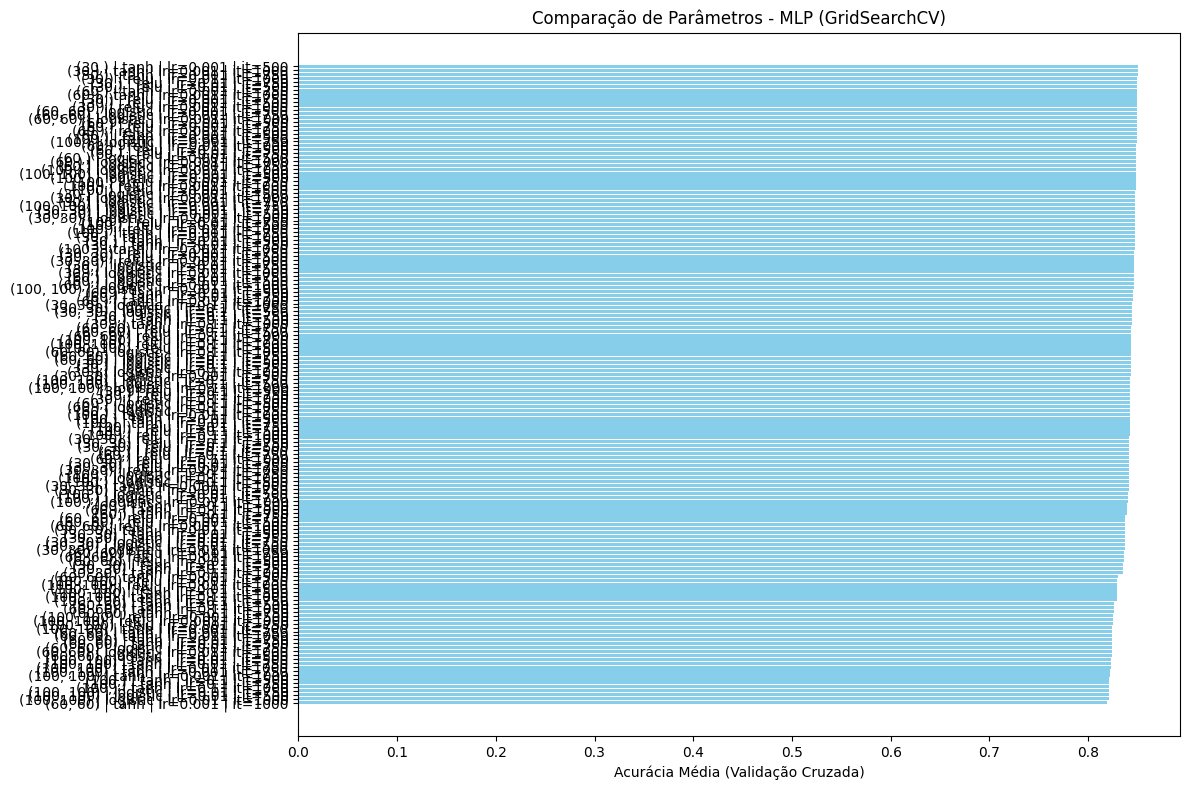

In [13]:
# Transformar os resultados do GridSearch em DataFrame
results = pd.DataFrame(grid_search.cv_results_)

# Criar coluna descritiva para as combinações de parâmetros
results['param_combo'] = results['param_hidden_layer_sizes'].astype(str) + " | " + \
                         results['param_activation'].astype(str) + " | lr=" + \
                         results['param_learning_rate_init'].astype(str) + " | it=" + \
                         results['param_max_iter'].astype(str)

# Ordenar pela acurácia média
results.sort_values(by='mean_test_score', ascending=False, inplace=True)

# Plotar gráfico de barras com as melhores combinações
plt.figure(figsize=(12, 8))
plt.barh(results['param_combo'], results['mean_test_score'], color='skyblue')
plt.xlabel("Acurácia Média (Validação Cruzada)")
plt.title("Comparação de Parâmetros - MLP (GridSearchCV)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Após o treinamento do MLP, transformamos os resultados recebidos do código anterior em um DataFrame, para facilitar a mnipulação e visualização.

No gráfico gerado podemos observar que o eixo x representa a acurácia média da validação cruzada, para cada combinação feita pelos hiperparâmetros, a barra mais longa representa o melhor resultado. E o eixo y, temos as combinações dos parâmetros testados, mas a visualização ficou muito sobreposta, dificultando a leitura.




---



**Análise dos hiperparâmetros**

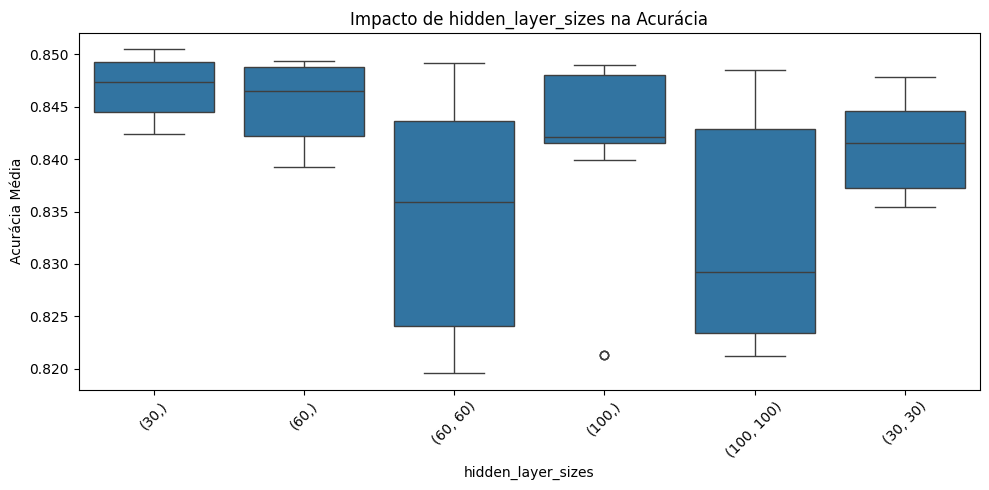

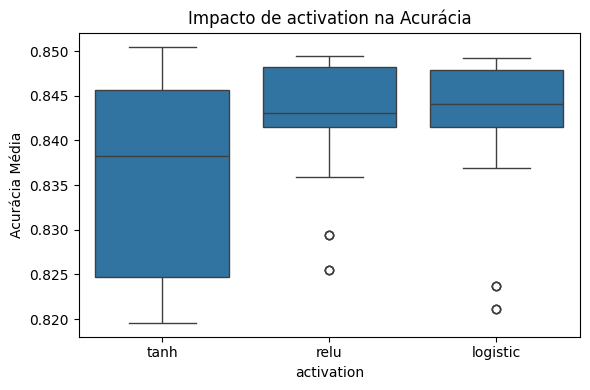

In [14]:
# Boxplot: hidden_layer_sizes
plt.figure(figsize=(10, 5))
# Converter as tuplas em strings para o boxplot
results['hidden_layer_sizes_str'] = results['param_hidden_layer_sizes'].astype(str)
sns.boxplot(data=results, x='hidden_layer_sizes_str', y='mean_test_score')
plt.title("Impacto de hidden_layer_sizes na Acurácia")
plt.xticks(rotation=45)
plt.xlabel("hidden_layer_sizes")
plt.ylabel("Acurácia Média")
plt.tight_layout()
plt.show()

# Boxplot: activation
plt.figure(figsize=(6, 4))
sns.boxplot(data=results, x='param_activation', y='mean_test_score')
plt.title("Impacto de activation na Acurácia")
plt.xlabel("activation")
plt.ylabel("Acurácia Média")
plt.tight_layout()
plt.show()

O primeiro boxplot, "Impacto de hidden_layer_sizes na Acurácia", mostra o impacto de diferentes parâmetros nas camadas ocultas na acurácia média. O eixo X, mostra diferentes arquiteturas testadas, e o eixo Y, faz referência a acurácia média obtida na validação cruzada. Modelos simples, com 1 camada oculta e 30-60 neurônios indicam ótimos resultados, diferente da de 2 camadas e cada com 60 neurônios, observando sua caixa larga, indicando um modelo mais instável.

O segundo boxplot, "Impacto de activation na Acurácia", o impacto da média da acurácia para as funcções de ativação, como a tanh, relu, e logistic. A tanh obteve maior variaão e mediana  menor; a relu teve uma mediana alta, e pouca variação nos resultados; e por fim, a logistic, com mediana estável e boa estabilidade. 



---



# KNN

In [ ]:
# Definir o classificador base
knn = KNeighborsClassifier()

# Grid de parâmetros para o KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# GridSearchCV com validação cruzada
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_knn.fit(X_train, y_train)

# Melhor modelo
best_model_knn = grid_search_knn.best_estimator_
print("\nMelhores parâmetros encontrados para KNN:", grid_search_knn.best_params_)
print(f"Acurácia média (cross-validação): {grid_search_knn.best_score_:.4f}")

# Avaliação no conjunto de teste
y_pred_knn = best_model_knn.predict(X_test)
test_accuracy_knn = accuracy_score(y_test, y_pred_knn)

print(f"Acurácia no teste (20%): {test_accuracy_knn:.4f}")
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_knn))

# Matriz de Confusão
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['income'].classes_,
            yticklabels=label_encoders['income'].classes_)
plt.title("Matriz de Confusão - KNN (Melhor Modelo)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.tight_layout()
plt.show()

In [ ]:
# Visualização dos resultados do GridSearch para KNN
results_knn = pd.DataFrame(grid_search_knn.cv_results_)

# Criar coluna descritiva para as combinações de parâmetros
results_knn['param_combo'] = "k=" + results_knn['param_n_neighbors'].astype(str) + " | " + \
                            results_knn['param_weights'] + " | " + \
                            results_knn['param_metric']

# Ordenar pela acurácia média
results_knn.sort_values(by='mean_test_score', ascending=False, inplace=True)

# Plotar gráfico de barras com as melhores combinações
plt.figure(figsize=(12, 8))
plt.barh(results_knn['param_combo'], results_knn['mean_test_score'], color='lightgreen')
plt.xlabel("Acurácia Média (Validação Cruzada)")
plt.title("Comparação de Parâmetros - KNN (GridSearchCV)")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# Boxplot para número de vizinhos
plt.figure(figsize=(10, 5))
sns.boxplot(data=results_knn, x='param_n_neighbors', y='mean_test_score')
plt.title("Impacto do Número de Vizinhos na Acurácia")
plt.xlabel("Número de Vizinhos (k)")
plt.ylabel("Acurácia Média")
plt.tight_layout()
plt.show()

# Boxplot para pesos
plt.figure(figsize=(6, 4))
sns.boxplot(data=results_knn, x='param_weights', y='mean_test_score')
plt.title("Impacto dos Pesos na Acurácia")
plt.xlabel("Tipo de Peso")
plt.ylabel("Acurácia Média")
plt.tight_layout()
plt.show()

## RESULTADOS


---

Responder discussões e reflexões


## CONCLUSÃO


---



A melhor arquitetura não é aquela com a melhor média geral por hiperparâmetro, mas sim a combinação ideal entre todos os parâmetros testados.

No seu caso, a combinação (30,) + tanh + lr=0.001 + adam foi a mais eficiente e precisa. Mesmo o relu e logistic tendo melhor estabilidade.